In [1]:
# Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [2]:
train_df = pd.read_csv('../input/petfinder-pawpularity-score/train.csv')
test_df = pd.read_csv('../input/petfinder-pawpularity-score/test.csv')

In [3]:
train_df.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0 to 9911
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             9912 non-null   object
 1   Subject Focus  9912 non-null   int64 
 2   Eyes           9912 non-null   int64 
 3   Face           9912 non-null   int64 
 4   Near           9912 non-null   int64 
 5   Action         9912 non-null   int64 
 6   Accessory      9912 non-null   int64 
 7   Group          9912 non-null   int64 
 8   Collage        9912 non-null   int64 
 9   Human          9912 non-null   int64 
 10  Occlusion      9912 non-null   int64 
 11  Info           9912 non-null   int64 
 12  Blur           9912 non-null   int64 
 13  Pawpularity    9912 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 1.1+ MB


In [5]:
test_df.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,4128bae22183829d2b5fea10effdb0c3,1,0,1,0,0,1,1,0,0,1,0,1
1,43a2262d7738e3d420d453815151079e,0,1,0,0,0,0,1,1,0,0,0,0
2,4e429cead1848a298432a0acad014c9d,0,0,0,1,0,1,1,1,0,1,1,1
3,80bc3ccafcc51b66303c2c263aa38486,1,0,1,0,0,0,0,0,0,0,1,0
4,8f49844c382931444e68dffbe20228f4,1,1,1,0,1,1,0,1,0,1,1,0


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             8 non-null      object
 1   Subject Focus  8 non-null      int64 
 2   Eyes           8 non-null      int64 
 3   Face           8 non-null      int64 
 4   Near           8 non-null      int64 
 5   Action         8 non-null      int64 
 6   Accessory      8 non-null      int64 
 7   Group          8 non-null      int64 
 8   Collage        8 non-null      int64 
 9   Human          8 non-null      int64 
 10  Occlusion      8 non-null      int64 
 11  Info           8 non-null      int64 
 12  Blur           8 non-null      int64 
dtypes: int64(12), object(1)
memory usage: 960.0+ bytes


## EDA and DATA VISUALIZATION

In [7]:
train_df1 = train_df.copy()
train_df = train_df.drop('Id', axis=1)

In [8]:
train_df.describe()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
count,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000
mean,0.027643,0.772599,0.903955,0.861582,0.009988,0.067797,0.129338,0.049637,0.166263,0.172014,0.061239,0.070420,38.039044
std,0.163957,0.419175,0.294668,0.345356,0.099444,0.251409,0.335591,0.217204,0.372335,0.377411,0.239780,0.255866,20.591990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [9]:
test_df.describe()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
count,8.000000,8.00000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000
mean,0.625000,0.25000,0.625000,0.25000,0.375000,0.625000,0.500000,0.625000,0.25000,0.500000,0.625000,0.500000
std,0.517549,0.46291,0.517549,0.46291,0.517549,0.517549,0.534522,0.517549,0.46291,0.534522,0.517549,0.534522
min,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,0.00000,1.000000,0.00000,0.000000,1.000000,0.500000,1.000000,0.00000,0.500000,1.000000,0.500000
75%,1.000000,0.25000,1.000000,0.25000,1.000000,1.000000,1.000000,1.000000,0.25000,1.000000,1.000000,1.000000
max,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [10]:
# Let's check the label
fig =px.histogram(train_df, x='Pawpularity')
fig.show()

So, from above figure we can see that most pets' pawpularity lie between 20 and 40. 
Let's dive deep into it by using a box plot.

In [11]:

fig = px.box(train_df, y="Pawpularity")
fig.show()

<AxesSubplot:>

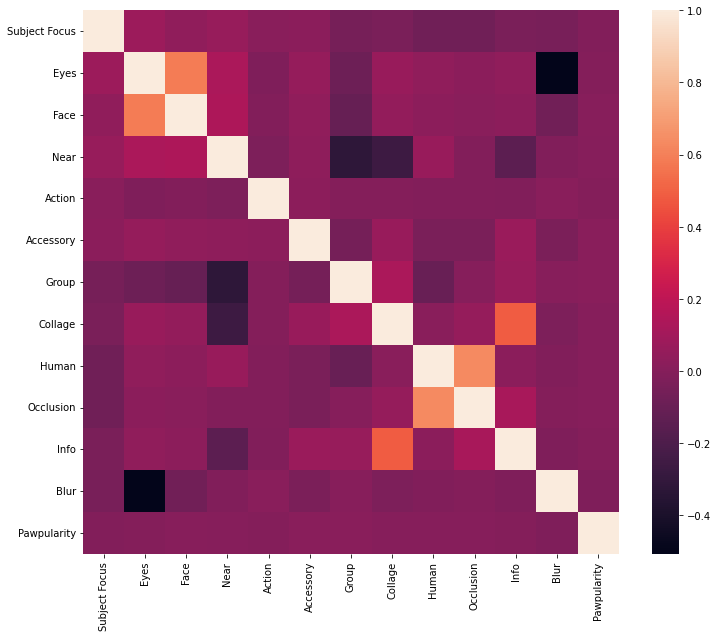

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr())

From the above figure, we can see that
1. Face anf eyes have some positive correlation
2. Info and collage also have some positive correlation
3. Occlusiona nd Human also have some positive correlation

Now, let's investigate these features and why do they have these correlations.

Face and Eyes of the pets

In [13]:
train_df.Eyes.value_counts()

1    7658
0    2254
Name: Eyes, dtype: int64

In [14]:
train_df.Face.value_counts()

1    8960
0     952
Name: Face, dtype: int64

<AxesSubplot:xlabel='Face', ylabel='Eyes'>

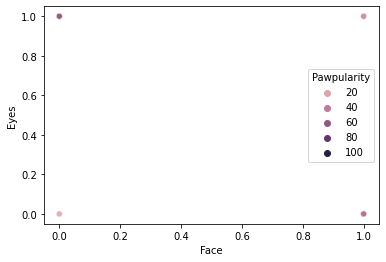

In [15]:
sns.scatterplot(x='Face', y='Eyes',hue= 'Pawpularity' , data= train_df1)

Okay, this might not be intuitive but when both Eyes and Faces are clearly seen in the photo, the pawpularity score comes down to 40. When Eyes are facing the front the score increases to 60. 

Occlusin and Info

<AxesSubplot:xlabel='Occlusion', ylabel='Info'>

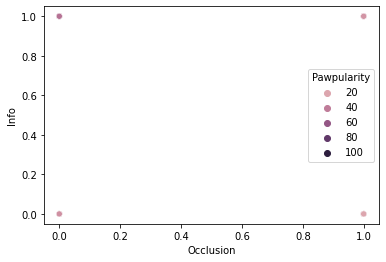

In [16]:
sns.scatterplot(x='Occlusion', y='Info',hue= 'Pawpularity' , data= train_df1)

More on relationships

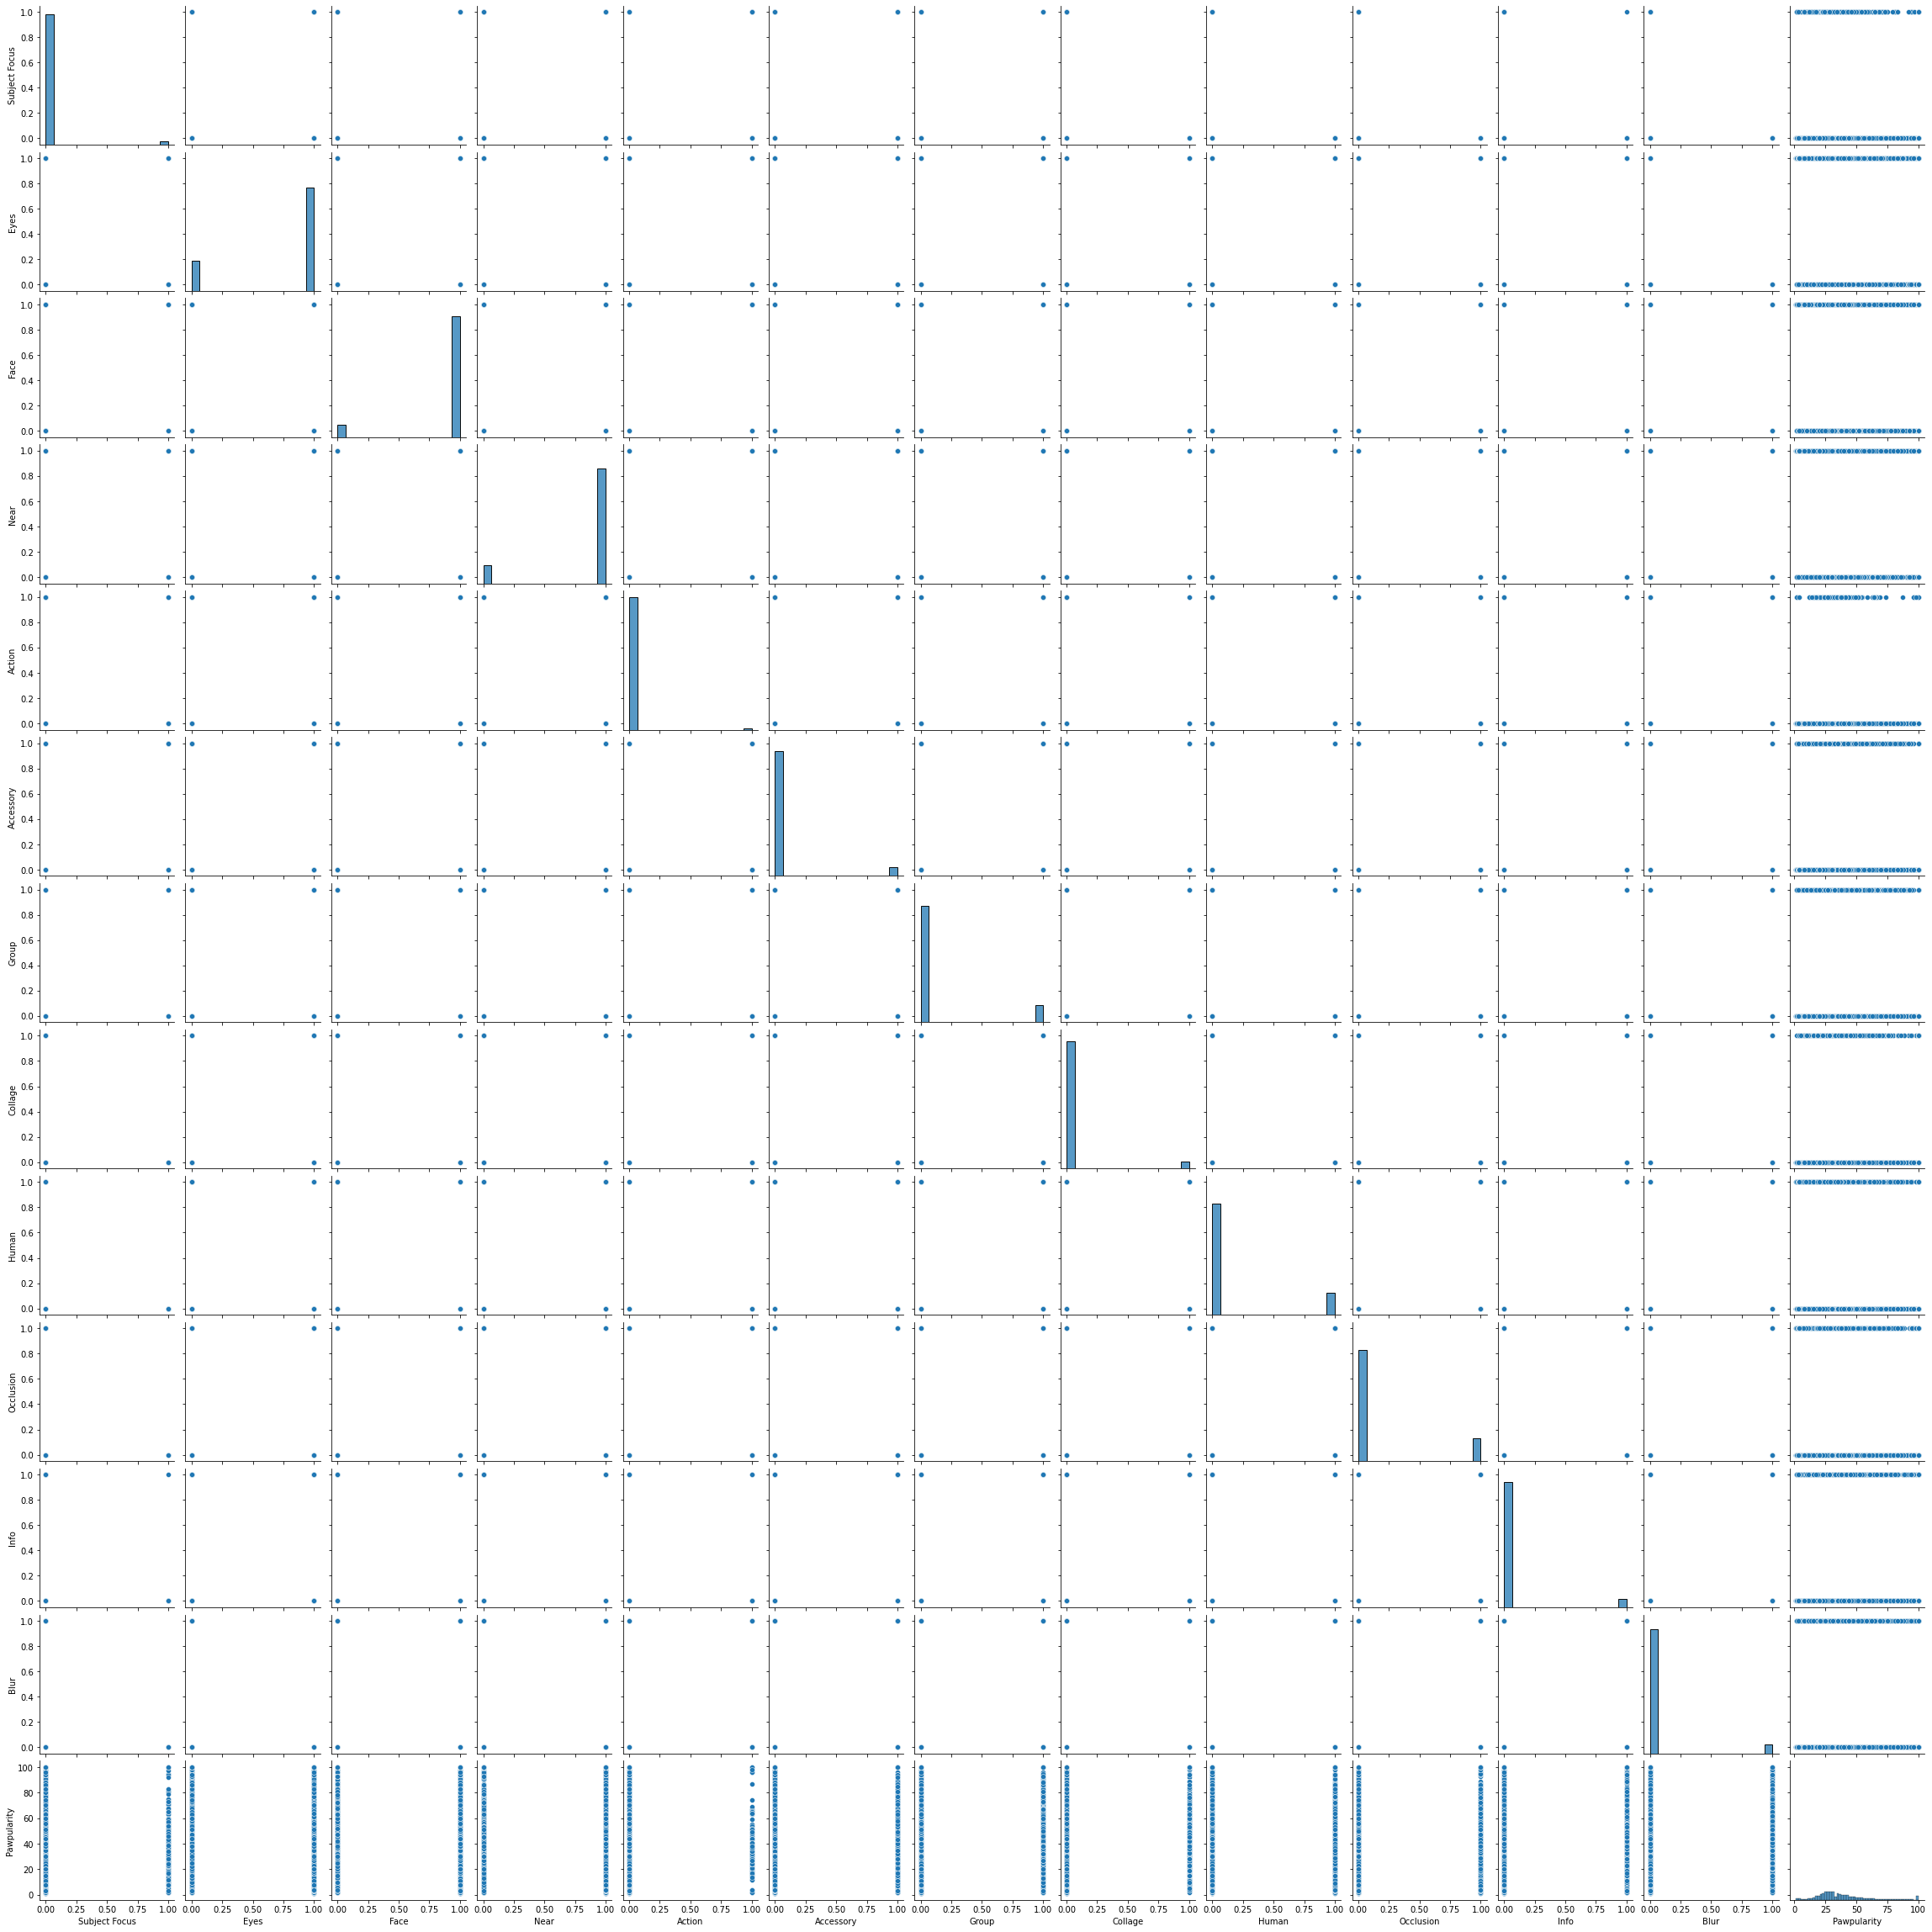

In [17]:
sns.pairplot(train_df)

# Let's find the correlations in test dataset

In [18]:
# Removing the Id column
test_df = test_df.drop('Id', axis=1)

<AxesSubplot:>

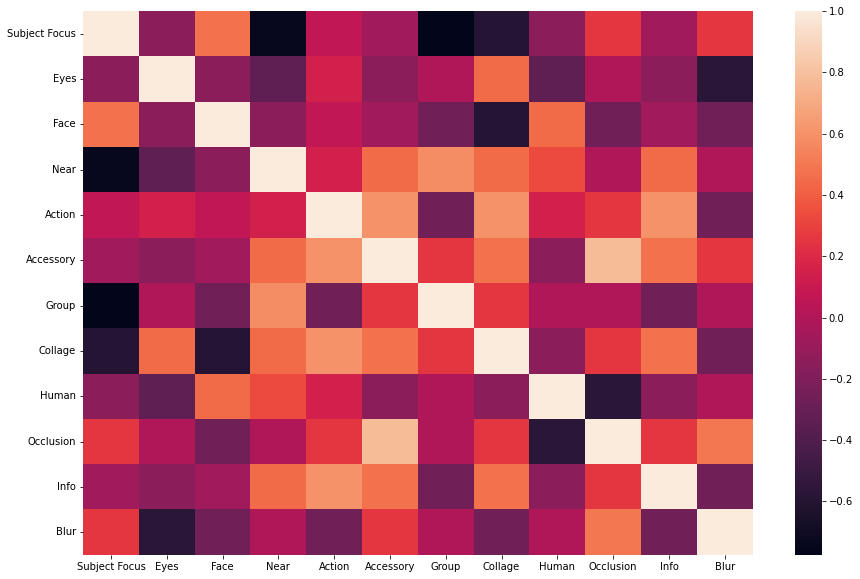

In [19]:
plt.figure(figsize=(15, 10))

sns.heatmap(test_df.corr())

This is interesting we have many more correlations between the features in test dataset.

# Modelling and Evaluation

As the data is already processesed we can proceed with modelling. I'm not doing any scaling as I will be using tree and gradient based methods.

Splitting the dataset

In [20]:
X = train_df.drop('Pawpularity', axis=1)
y = train_df['Pawpularity']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

# Gradient Boosting Regressor

In [21]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pred, squared= False)
print(mse)

21.114637215564386


# XGBOOST

In [23]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred, squared=False)
print(mse1)

21.459469299278187


# Light Gradient Boosting Regressor

In [24]:
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred, squared= False)
print(mse2)

21.17682699629166


# CatBoost Regressor

In [25]:
catboost = CatBoostRegressor()
catboost.fit(X_train, y_train)
y_pred = catboost.predict(X_test)
mse3 = mean_squared_error(y_test, y_pred, squared= False)

Learning rate set to 0.055603
0:	learn: 20.3851133	total: 52.5ms	remaining: 52.4s
1:	learn: 20.3799479	total: 54.8ms	remaining: 27.4s
2:	learn: 20.3733196	total: 56.9ms	remaining: 18.9s
3:	learn: 20.3664544	total: 59.1ms	remaining: 14.7s
4:	learn: 20.3612972	total: 61.3ms	remaining: 12.2s
5:	learn: 20.3544991	total: 63.6ms	remaining: 10.5s
6:	learn: 20.3532952	total: 64.9ms	remaining: 9.21s
7:	learn: 20.3499240	total: 66.9ms	remaining: 8.3s
8:	learn: 20.3443911	total: 70.3ms	remaining: 7.74s
9:	learn: 20.3377879	total: 73.2ms	remaining: 7.25s
10:	learn: 20.3361736	total: 75.6ms	remaining: 6.79s
11:	learn: 20.3306288	total: 77.4ms	remaining: 6.37s
12:	learn: 20.3273115	total: 79.2ms	remaining: 6.02s
13:	learn: 20.3232328	total: 81.2ms	remaining: 5.72s
14:	learn: 20.3188974	total: 83.2ms	remaining: 5.46s
15:	learn: 20.3155932	total: 85ms	remaining: 5.23s
16:	learn: 20.3112066	total: 88ms	remaining: 5.09s
17:	learn: 20.3077737	total: 91.7ms	remaining: 5s
18:	learn: 20.3056854	total: 94.8m

In [26]:
print(mse3)

21.39859611302683


Okay, I'm not satisfied by the results. So let's try something else. Decision Trees.

DECISION TREES

In [27]:
tree_reg =DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)
mse4 = mean_squared_error(y_test, y_pred, squared= False)
print(mse4)

21.4690917671688


Summary of the scores

In [28]:
results = [{"Gradient Boosting":mse,'XGBoost': mse1,'LGBMRegression': mse2,'CatBoostRegressor':mse3, 'Decision Tree': mse4} ]

In [29]:
results_df = pd.DataFrame(results)
results_df

,Gradient Boosting,XGBoost,LGBMRegression,CatBoostRegressor,Decision Tree
0,21.114637,21.459469,21.176827,21.398596,21.469092


As we have seen the best models are:
1. Gradient Boosting Regressor
2. LGBM Regression
3. CatBoost Regression

So using these three models we use will make a stacked regressor using scikit learn's function.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html

In [30]:
estimators = [
    ('LGBM', LGBMRegressor()),
    ('catboost', CatBoostRegressor())]

In [31]:
reg = StackingRegressor(estimators=estimators,
                        final_estimator=GradientBoostingRegressor(random_state=42))

In [32]:
reg.fit(X_train, y_train).score(X_test, y_test)

Learning rate set to 0.055603
0:	learn: 20.3851133	total: 2.92ms	remaining: 2.91s
1:	learn: 20.3799479	total: 4.83ms	remaining: 2.41s
2:	learn: 20.3733196	total: 6.71ms	remaining: 2.23s
3:	learn: 20.3664544	total: 8.79ms	remaining: 2.19s
4:	learn: 20.3612972	total: 10.9ms	remaining: 2.16s
5:	learn: 20.3544991	total: 12.7ms	remaining: 2.11s
6:	learn: 20.3532952	total: 14.3ms	remaining: 2.04s
7:	learn: 20.3499240	total: 16.2ms	remaining: 2.01s
8:	learn: 20.3443911	total: 18.3ms	remaining: 2.02s
9:	learn: 20.3377879	total: 20.6ms	remaining: 2.04s
10:	learn: 20.3361736	total: 23.8ms	remaining: 2.14s
11:	learn: 20.3306288	total: 26.8ms	remaining: 2.21s
12:	learn: 20.3273115	total: 30ms	remaining: 2.28s
13:	learn: 20.3232328	total: 32.9ms	remaining: 2.31s
14:	learn: 20.3188974	total: 35.3ms	remaining: 2.31s
15:	learn: 20.3155932	total: 38.2ms	remaining: 2.35s
16:	learn: 20.3112066	total: 41.1ms	remaining: 2.38s
17:	learn: 20.3077737	total: 43.8ms	remaining: 2.39s
18:	learn: 20.3056854	total:

-0.00679790840383343

In [33]:
y_pred = reg.predict(X_test)

In [34]:
MSE = mean_squared_error(y_test, y_pred, squared = False)
print(MSE)

21.11421777333179


Slightly better. Gradient Boosting Regressor had RMSE of 21.1146.

Let's predict on test dataset.

In [35]:
Y_pred = reg.predict(test_df)

In [36]:
Y_pred

array([32.13851197, 32.60869039, 39.22274738, 28.3231006 , 33.36010714,
       38.27414856, 32.63550419, 40.91081725])

Submission file

In [37]:
submission_file = pd.read_csv('../input/petfinder-pawpularity-score/sample_submission.csv')

In [38]:
submission_file['Pawpularity'] = Y_pred

In [39]:
submission_file

,Id,Pawpularity
0,4128bae22183829d2b5fea10effdb0c3,32.138512
1,43a2262d7738e3d420d453815151079e,32.608690
2,4e429cead1848a298432a0acad014c9d,39.222747
3,80bc3ccafcc51b66303c2c263aa38486,28.323101
4,8f49844c382931444e68dffbe20228f4,33.360107
5,b03f7041962238a7c9d6537e22f9b017,38.274149
6,c978013571258ed6d4637f6e8cc9d6a3,32.635504
7,e0de453c1bffc20c22b072b34b54e50f,40.910817


In [40]:
submission_file.to_csv("submission.csv", index=False)
submission_file.head()

,Id,Pawpularity
0,4128bae22183829d2b5fea10effdb0c3,32.138512
1,43a2262d7738e3d420d453815151079e,32.608690
2,4e429cead1848a298432a0acad014c9d,39.222747
3,80bc3ccafcc51b66303c2c263aa38486,28.323101
4,8f49844c382931444e68dffbe20228f4,33.360107
